In [3]:
import numpy as np
import pandas as pd
import astropy
from astropy import table
from astropy.io import fits
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
#from numpy.lib import recfunctions as rfn # to convert record array to regular array

In [4]:
tbl = astropy.table.Table.read('Christina_Jonah_data/darks_with_resist/1s_darks/psd_201111_152123_tint1s_sdr0_fsw50Ohm_calibration_wLNA.fits')
print(tbl)
print(tbl.columns)

    freq1          freq2      ...      fsw_rvel2              fsw_pow        
-------------- -------------- ... ------------------- -----------------------
  1419443000.0   1418969000.0 ...  303.24247062455555   0.0009688829733394159
1419444171.875 1418970171.875 ...  302.99513335044804  0.00030748001025515063
 1419445343.75  1418971343.75 ...   302.7477960763886   7.056302848247164e-05
1419446515.625 1418972515.625 ...  302.50045880232915   0.0004849850576371037
  1419447687.5   1418973687.5 ...  302.25312152826973 -0.00020804570107848478
1419448859.375 1418974859.375 ...  302.00578425421025   9.300033288920859e-05
 1419450031.25  1418976031.25 ...   301.7584469801028  0.00027375115923717296
1419451203.125 1418977203.125 ...   301.5111097060433 -0.00013798471201678826
  1419452375.0   1418978375.0 ...   301.2637724319839   9.076712934689545e-05
1419453546.875 1418979546.875 ...   301.0164351579245 -0.00034208554244172153
           ...            ... ...                 ...           

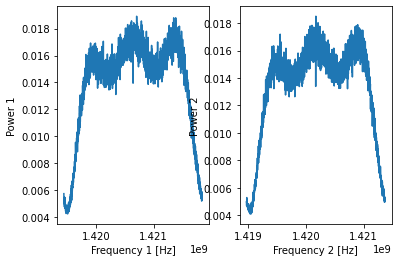

In [5]:
plt.subplot(121)
plt.plot(tbl['freq1'], tbl['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')

plt.subplot(122)
plt.plot(tbl['freq2'], tbl['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.show()

In [6]:
path = 'Francisco_data/'
tbl1 = astropy.table.Table.read(path+'psd_201113_020041_tint1s_sdr0_fswbasic_calibration_resistor_on_1s_1.fits')
# hmm let's see if I can do this more elegantly, even with record arrays
# it appears so: https://stackoverflow.com/questions/5957380/convert-structured-array-to-regular-numpy-array

In [7]:
file_names1 = glob(path+'*calibration_resistor_on_1s_*')
file_names2 = glob(path+'*calibration_resistor_off_1s_*')
file_names3 = glob(path+'*calibration_lan_resistor_on_1s_*')
file_names4 = glob(path+'*calibration_lan_resistor_off_1s_*')

def median_combine(file_names, col_names):
    images = []
    for i in range(len(file_names)):
        image = fits.getdata(np.sort(file_names)[i])
        #image = image.view((float, len(image.dtype.names))) # convert record array to regular nd numpy array
        #image = rfn.unstructured_to_structured(image)
        image = np.array(image.tolist())
        images.append(image)
    im_array = np.array(images)
    combine = np.median(1.0*im_array, axis=0)
    return pd.DataFrame(combine, columns=col_names)


In [ ]:
"""
# original test: median-combine 1s resister on/no LNA dark frames
dark1_res = np.median(1.0*im_array, axis=0)
print(dark1_res.shape)
dark1_res = pd.DataFrame(dark1_res, columns=tbl.columns)
print(dark1_res)
"""

In [9]:
dark_res = median_combine(file_names1, tbl.columns)
dark = median_combine(file_names2, tbl.columns)
dark_lan_res = median_combine(file_names3, tbl.columns)
dark_lan = median_combine(file_names4, tbl.columns)
darks = [dark_res, dark, dark_lan_res, dark_lan]
titles = ['Dark 1s Resister On LNA Off', 'Dark 1s Resister Off LNA Off', 
          'Dark 1s Resister On LNA On', 'Dark 1s Resister Off LNA On']

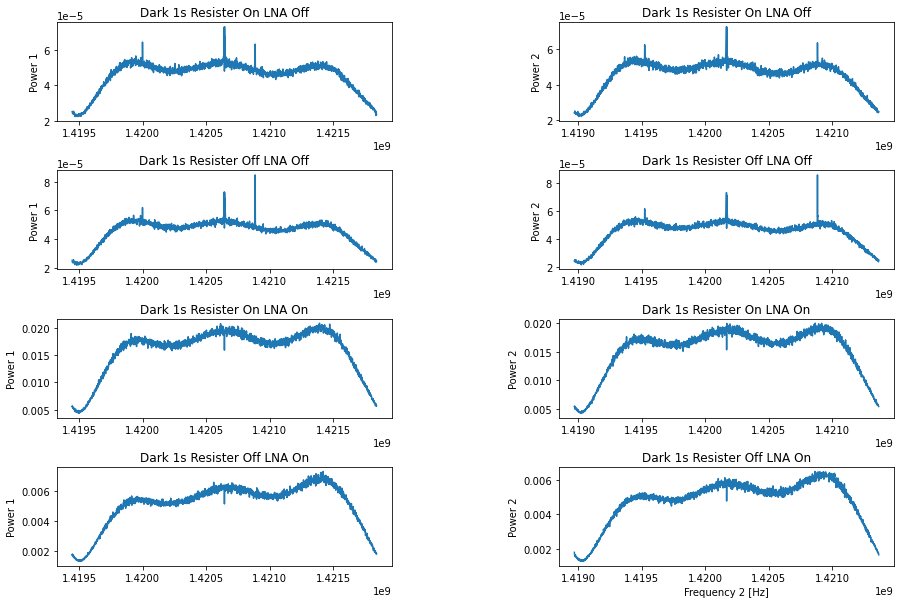

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()
for i in range(len(darks)):
    #ax = axes[i]
    #fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
    plt.subplot(421+2*i)
    plt.ylabel('Power 1')
    plt.title(titles[i])
    plt.plot(darks[i]['freq1'], darks[i]['power1']) # cycle back once
    
    plt.subplot(422+2*i)
    plt.ylabel('Power 2')
    plt.title(titles[i])
    plt.plot(darks[i]['freq2'], darks[i]['power2']) # cycle back once

plt.xlabel('Frequency 1 [Hz]')
plt.xlabel('Frequency 2 [Hz]')
plt.savefig('freq_v_power.png', bbox_inches='tight', dpi=100)
plt.show()

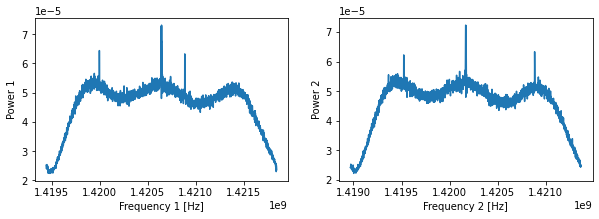

In [113]:
"""f = plt.figure(figsize=(10,3))
#plt.subplots_adjust(wspace=0.5)

plt.subplot(421)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(422)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(423)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(424)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')

plt.subplot(425)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(426)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')

plt.subplot(427)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(428)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')


plt.show()"""

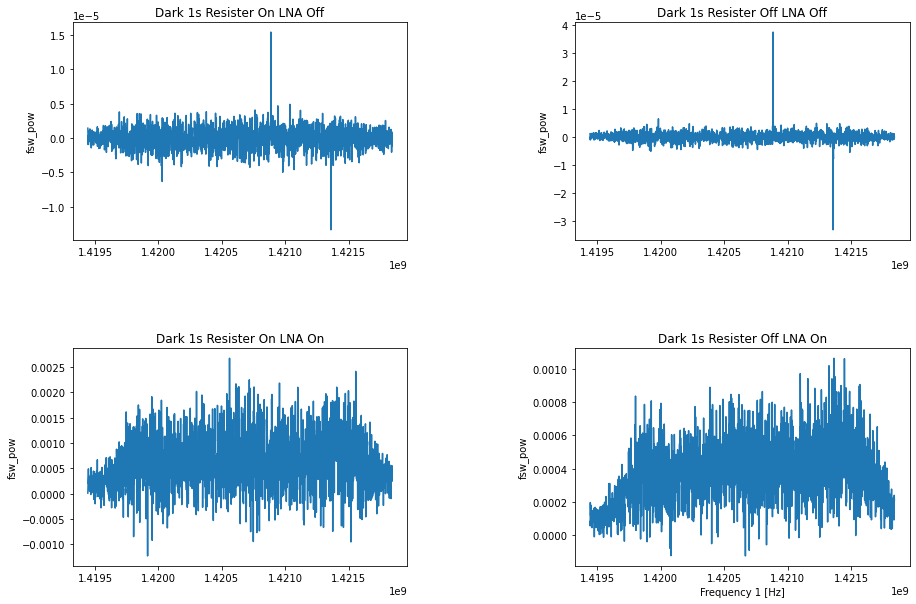

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()
for i in range(len(darks)):
    #ax = axes[i]
    #fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
    plt.subplot(221+i)
    plt.ylabel('fsw_pow') # frequency switched wavelength(?) power
    plt.title(titles[i])
    plt.plot(darks[i]['freq1'], darks[i]['fsw_pow']) # cycle back once

plt.xlabel('Frequency 1 [Hz]')
#plt.savefig('freq_v_fswpow.png', bbox_inches='tight', dpi=100)
plt.show()